# EQUITY BARRIER OPTIONS - VALUATION ANALYSIS

Valuation and Risk of Equity Barrier Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves.FinDiscountCurveFlat import *
from financepy.products.equity.FinEquityVanillaOption import *
from financepy.products.equity.FinEquityBarrierOption import *
from financepy.products.equity.FinEquityModelTypes import FinEquityModelBlackScholes

###################################################################
#   WELCOME TO FINANCEPY BETA VERSION 0.171 UNDER DEVELOPMENT     #
# FinancePy it is distributed FREE & WITHOUT ANY WARRANTY AND     #
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. For more   #
# details see the repo at https://github.com/domokane/FinancePy   #
###################################################################



## Types of Barrier Option

In [3]:
for barrierType in FinEquityBarrierTypes:
    print(barrierType)

FinEquityBarrierTypes.DOWN_AND_OUT_CALL
FinEquityBarrierTypes.DOWN_AND_IN_CALL
FinEquityBarrierTypes.UP_AND_OUT_CALL
FinEquityBarrierTypes.UP_AND_IN_CALL
FinEquityBarrierTypes.UP_AND_OUT_PUT
FinEquityBarrierTypes.UP_AND_IN_PUT
FinEquityBarrierTypes.DOWN_AND_OUT_PUT
FinEquityBarrierTypes.DOWN_AND_IN_PUT


## Market Environment

In [7]:
interestRate = 0.05

In [8]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [9]:
dividendYield = 0.01

In [10]:
volatility = 0.20

In [11]:
model = FinEquityModelBlackScholes(volatility)

## Simple Example: Up and Out Call

This is an option whose that knocks out if the barrier is crossed from below. We're at maturity !

In [63]:
valueDate = FinDate(1, 9, 2020)
expiryDate = FinDate(1, 9, 2020)
numObservations = 1

In [64]:
barrierType = FinEquityBarrierTypes.UP_AND_OUT_CALL

In [65]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [66]:
strikePrice = 1.3
barrierPrice = 1.45
stockPrices = np.linspace(1.2, 1.6, 100)

In [67]:
barrierOpt = FinEquityBarrierOption(expiryDate, strikePrice, barrierType, barrierPrice, numObservations)

In [68]:
values = barrierOpt.value(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Value')

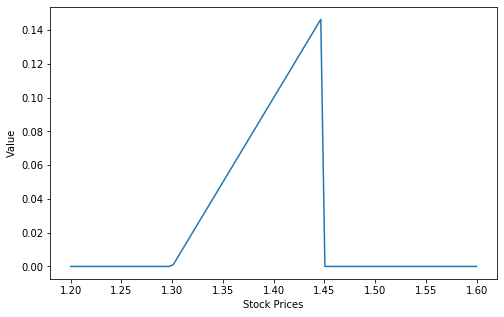

In [69]:
plt.figure(figsize=(8,5))
plt.plot(stockPrices, values)  
plt.xlabel("Stock Prices")
plt.ylabel("Value")

In [71]:
deltas = barrierOpt.delta(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Delta')

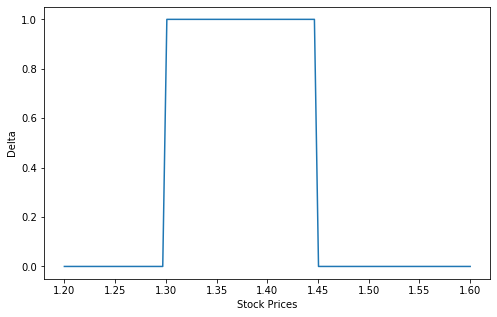

In [72]:
plt.figure(figsize=(8,5))
plt.plot(stockPrices, deltas)  
plt.xlabel("Stock Prices")
plt.ylabel("Delta")

## Test: IN + OUT barrier = VANILLA option

In [98]:
valueDate = FinDate(1, 1, 2020)
expiryDate = FinDate(1, 1, 2021)
numObservations = (expiryDate - valueDate)

In [104]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [113]:
stockPrice = 105.0
strikePrice = 100.0
barrierPrice = 90.0

We examine all of the combinations of IN and OUT

In [114]:
barrierIn = FinEquityBarrierTypes.DOWN_AND_IN_CALL
barrierOut = FinEquityBarrierTypes.DOWN_AND_OUT_CALL
barrierInOpt = FinEquityBarrierOption(expiryDate, strikePrice, barrierIn, barrierPrice, numObservations)
barrierOutOpt = FinEquityBarrierOption(expiryDate, strikePrice, barrierOut, barrierPrice, numObservations)
callOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL)
v_in = barrierInOpt.value(valueDate, stockPrice, discountCurve, dividendYield, model)
v_out = barrierOutOpt.value(valueDate, stockPrice, discountCurve, dividendYield, model)
v_call = callOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
print(v_in, v_out, v_call, v_in + v_out)

0.8822396878578438 12.240502483279055 13.122742171136899 13.122742171136899


In [115]:
barrierIn = FinEquityBarrierTypes.UP_AND_IN_CALL
barrierOut = FinEquityBarrierTypes.UP_AND_OUT_CALL
barrierInOpt = FinEquityBarrierOption(expiryDate, strikePrice, barrierIn, barrierPrice, numObservations)
barrierOutOpt = FinEquityBarrierOption(expiryDate, strikePrice, barrierOut, barrierPrice, numObservations)
callOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL)
v_in = barrierInOpt.value(valueDate, stockPrice, discountCurve, dividendYield, model)
v_out = barrierOutOpt.value(valueDate, stockPrice, discountCurve, dividendYield, model)
v_call = callOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
print(v_in, v_out, v_call, v_in + v_out)

13.122742171136899 0.0 13.122742171136899 13.122742171136899


In [116]:
barrierIn = FinEquityBarrierTypes.DOWN_AND_IN_PUT
barrierOut = FinEquityBarrierTypes.DOWN_AND_OUT_PUT
barrierInOpt = FinEquityBarrierOption(expiryDate, strikePrice, barrierIn, barrierPrice, numObservations)
barrierOutOpt = FinEquityBarrierOption(expiryDate, strikePrice, barrierOut, barrierPrice, numObservations)
putOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT)
v_in = barrierInOpt.value(valueDate, stockPrice, discountCurve, dividendYield, model)
v_out = barrierOutOpt.value(valueDate, stockPrice, discountCurve, dividendYield, model)
v_put = putOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
print(v_in, v_out, v_put, v_in + v_out)

4.058027759417696 0.22471162355490115 4.282739382972597 4.282739382972597


In [117]:
barrierIn = FinEquityBarrierTypes.UP_AND_IN_PUT
barrierOut = FinEquityBarrierTypes.UP_AND_OUT_PUT
barrierInOpt = FinEquityBarrierOption(expiryDate, strikePrice, barrierIn, barrierPrice, numObservations)
barrierOutOpt = FinEquityBarrierOption(expiryDate, strikePrice, barrierOut, barrierPrice, numObservations)
putOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT)
v_in = barrierInOpt.value(valueDate, stockPrice, discountCurve, dividendYield, model)
v_out = barrierOutOpt.value(valueDate, stockPrice, discountCurve, dividendYield, model)
v_put = putOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
print(v_in, v_out, v_put, v_in + v_out)

4.282739382972597 0.0 4.282739382972597 4.282739382972597


# Examining Barrier Values and Risk

In [118]:
barrierPrice = 120.0
strikePrice = 90.0

In [119]:
valueDate = FinDate(1, 6, 2020)
expiryDate = FinDate(1, 12, 2020)

In [120]:
stockPrices = np.linspace(50,150,100)

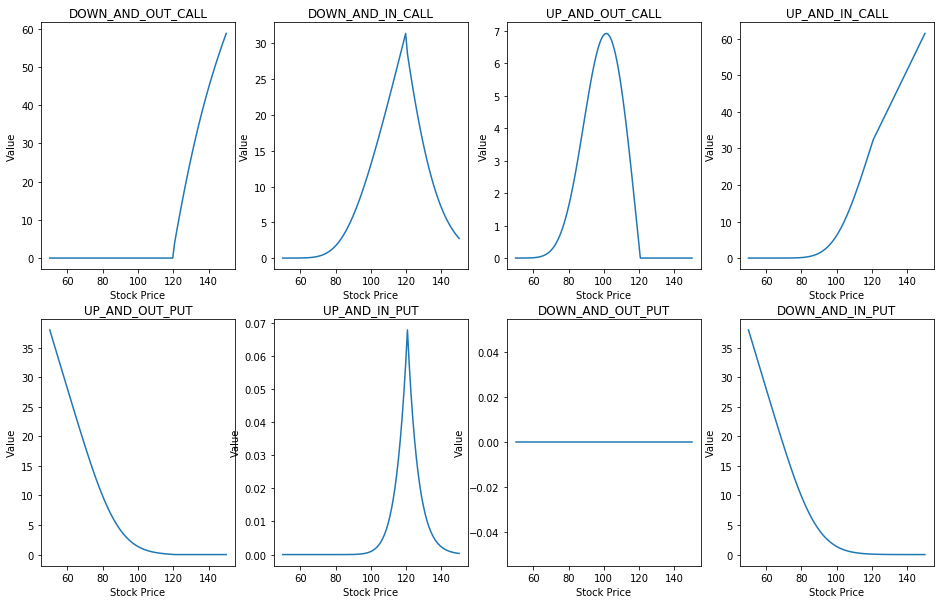

In [121]:
f1 = plt.figure(figsize=(16,10))
r = 1
for barrierType in FinEquityBarrierTypes:
    barrierOption = FinEquityBarrierOption(expiryDate, strikePrice, barrierType, barrierPrice, numObservations)
    v = barrierOption.value(valueDate, stockPrices, discountCurve, dividendYield, model)
    plt.subplot(2, 4, r)  
    r = r + 1

    plt.plot(stockPrices, v)  
    plt.title(barrierType.name)
    plt.xlabel("Stock Price")
    plt.ylabel("Value")

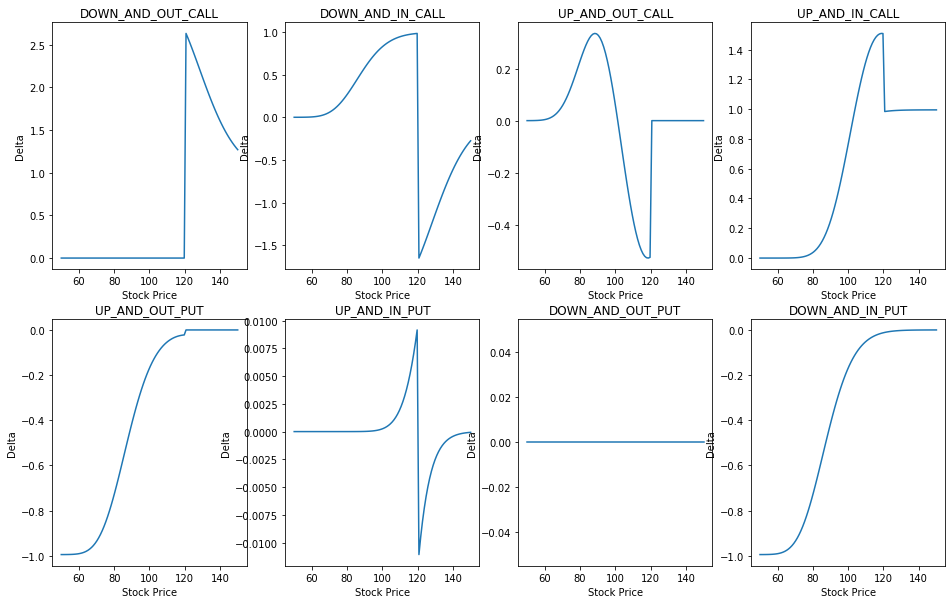

In [122]:
f1 = plt.figure(figsize=(16,10))
r = 1
for barrierType in FinEquityBarrierTypes:
    barrierOption = FinEquityBarrierOption(expiryDate, strikePrice, barrierType, barrierPrice, numObservations)
    v = barrierOption.delta(valueDate, stockPrices, discountCurve, dividendYield, model)
    plt.subplot(2, 4, r)  
    r = r +1
    plt.plot(stockPrices, v)  
    plt.title(barrierType.name)
    plt.xlabel("Stock Price")
    plt.ylabel("Delta")

Copyright (c) 2020 Dominic O'Kane